#**Práctica: Redes Neuronales para la clasificación de imágenes**

Utilizaremos el conjunto de datos denominado MNIST (*Modified National Institute of Standards and Technology*) que es un conjunto de 70,000 imágenes de digitos del 0 al 9 escritos a mano, con la mano derecha.

 Este conjunto es utilizado para entrenar sistemas de procesamiento de imágenes y se aplica regularmente al entrenamiento de algoritmos de clasificación.

  El conjunto de datos se divide en 60,000 imagenes de entrenamiento y 10,000 de prueba.

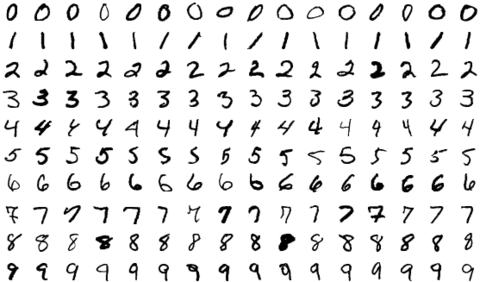  

Ejemplos de las imágenes del set MNIST

# **Definición de la tarea**

La tarea que llevaremos a cabo, es entrenar la Red Neuronal para clasificar imágenes e identificar a qué digito corresponde.
Para realizar esta tarea entrenaremos una red neuronal utilizando Keras.

Keras es una biblioteca de código abierto (con licencia MIT) escrita en Python, que se basa principalmente en el trabajo de François Chollet, un desarrollador de Google, en el marco del proyecto ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System).

El objetivo de la biblioteca es acelerar la creación de redes neuronales: para ello, Keras no funciona como un framework independiente, sino como una interfaz de uso a través de una API que permite acceder a varios frameworks de aprendizaje automático.


Instalamos los paquetes necesarios para trabajar con los datos ya descritos

#**1.- Descarga de datos**


*   Keras recopila siete de los conjuntos de datos de muestra más comunes en Deep Learning a través de la clase keras.datasets.


In [ ]:
# Importar el conjunto de datos MNIST desde Keras
from keras.datasets import mnist


*   Separaremos los datos de entrenamiento (con 60,000 imágenes) y de prueba  (10,000) de forma automática

In [ ]:
# Cargar el conjunto de datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train contiene las imágenes de entrenamiento,
# y_train contiene las etiquetas de entrenamiento,
# x_test contiene las imágenes de prueba,
# y_test contiene las etiquetas de prueba

# Exploración básica del tamaño de los datos
print("Número de imágenes en el conjunto de entrenamiento:", x_train.shape[0])
print("Número de imágenes en el conjunto de prueba:", x_test.shape[0])

# Cada imagen tiene 28x28 píxeles
print("Tamaño de cada imagen:", x_train[0].shape)

*    Tenemos entonces los datos de entrenamiento (x_train, y_train) y prueba (x_test, y_test)  Podemos visualizar algunas imágenes de nuestro conjunto de entrenamiento

In [ ]:
#Importar las bibliotecas necesarias:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Seleccionar índices aleatorios,Esta línea genera 16 números enteros aleatorios que se utilizan como índices para seleccionar imágenes de x_train.
# Estos índices están en el rango de 0 a x_train.shape[0] (el número total de imágenes en el set de entrenamiento, que es 60,000).
ids_imgs = np.random.randint(0,x_train.shape[0],16)

ids_imgs

In [ ]:
#Visualización de imágenes en una cuadrícula:
# Inicia un bucle que recorrerá todos los índices almacenados en 'ids_imgs'
for i in range(len(ids_imgs)):
    # Extrae la imagen correspondiente al índice 'i' del arreglo 'ids_imgs' de 'x_train'
    img = x_train[ids_imgs[i],:,:]
    # Crea una subtrama en una figura de 4x4 en la posición 'i+1'
    plt.subplot(4,4,i+1)
    # Muestra la imagen 'img' en escala de grises
    plt.imshow(img, cmap='gray')
    # Desactiva los ejes para que no se muestren en la gráfica
    plt.axis('off')
    # Establece el título de la subtrama usando el valor de la etiqueta correspondiente de 'y_train'
    plt.title(y_train[ids_imgs[i]])
# Añade un título principal a toda la figura
plt.suptitle('16 imágenes del set MNIST')
# Muestra la figura completa con todas las subtramas
plt.show()

#**2.- Preprocesamiento de imágenes**

*   Para  establecer la arquitectura de nuestra red, primero debemos realizar un par de procesamientos adicionales sobre estas imágenes.
*   Las imágenes originales del MNIST fueron normalizadas de forma que se ajustaran a una malla de 20x20 píxeles, manteniendo las proporciones de la imagen original, el resultado se centró en un grid de 28x28 píxeles.
* Debido a que las Redes Neuronales sólo aceptan vectores como datos de entrada y, como este caso cada una de las imágenes de nuestro conjunto de datos es una matriz de 28x28 elementos, debemos convertir cada una de esas matrices en un vector.
* Para ejecutar este proceso utilizamos  la función reshape de Numpy

In [ ]:
# Cambia la forma de 'x_train' de (60000, 28, 28) a (60000, 784).
# Esto se hace al combinar las dimensiones de 28x28 píxeles de cada imagen en una única dimensión.
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))

# Cambia la forma de 'x_test' de (10000, 28, 28) a (10000, 784).
# Similar a 'x_train', combina las dimensiones de 28x28 píxeles de cada imagen de prueba en una única dimensión.
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))


* La intensidad de cada pixel en las imágeneses un parámetro que afecta a la convergencia de nuestra Red, en este caso cada pixel en el set de datos original tiene intensidades desde 0 (tonalidades oscuras) hasta 255 (tonalidades claras), para normalizar estos valores  dividimos cada imagen entre 255:

In [ ]:
# Divide cada valor en el conjunto de datos de entrenamiento 'X_train' por 255.
# Esto normaliza los valores de los píxeles, originalmente entre 0 y 255, al rango 0-1.
X_train = X_train / 255.0

# Divide cada valor en el conjunto de datos de prueba 'X_test' por 255.
# Similar a 'X_train', esto normaliza los valores de los píxeles al rango 0-1.
X_test = X_test / 255.0


* Cada categoría (del 0 al 9) debe ser representada en el formato one-hot, en el que cada elemento que no corresponde a la categoría se leasigna un 0 y al elemento que pertenece a la categoría se le asiga el valor 1,en este caso cada vector de 10 elementos (0 al 9)  sólo uno de estos elementos será diferente de cero.

Por ejemplo, si la categoría es 1

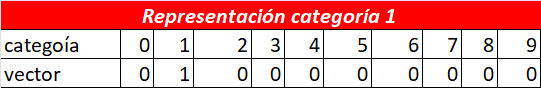


Por ejemplo, si la categoría es 6


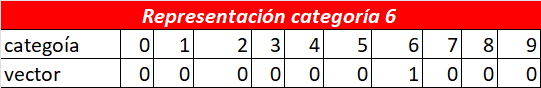

* Esta conversión al formato one-hot se puede implementar fácilmente usando la función .keras.utils

In [ ]:
from tensorflow.keras.utils import to_categorical
nclasses = 10
Y_train = to_categorical(y_train, nclasses)
Y_test = to_categorical(y_test, nclasses)

# 3.- Creación de la Red

Nuestra Red Neuronal tendrá :
* una capa de entrada con 784 nodos,  igual al tamaño de cada una de las imágenes aplanadas.
* una sola capa oculta con 15 neuronas y función de activación ReLU,
* una capa de salida con función de activación softmax y
* 10 neuronas de salida (correspondientes a las 10 diferentes categorías: del 0 al 9).

* Al inicio del entrenamiento los parámetros de la red neuronal se inicializan con valores aleatorios (en este caso vamos a fijar una semilla para que todos obtengamos los mismos resultados)

In [ ]:
# Establece la semilla del generador de números aleatorios de NumPy a 1.
np.random.seed(1)

* Definimos el tamaño de la entrada (input) qye es 784 y de la salida (output) que será 1 categoría , 1 elemento

In [ ]:
# Almacena el número de características (dimensiones de entrada) de cada muestra de entrenamiento en 'input_dim'.
# Esto es igual al número de columnas en 'X_train'.
input_dim = X_train.shape[1]

# Almacena el número de categorías o clases (dimensiones de salida) en 'output_dim'.
# Esto es igual al número de columnas en 'Y_train', que normalmente representa las diferentes clases en forma de codificación one-hot.
output_dim = Y_train.shape[1]


 **Importamos el modelo Sequential**

 * Sequential es un conjunto lineal de capas que te permite crear modelos de redes neuronales capa por capa de manera sencilla y directa.
 Puedes agregar capas usando el método .add()

In [ ]:
# Importa la clase 'Sequential' de la submódulo 'models' en la biblioteca Keras.
from keras.models import Sequential

# Crea una instancia de la clase 'Sequential'. Esta instancia 'modelo' será utilizada
# para construir un modelo de red neuronal capa por capa.
modelo = Sequential()


* Utilizamos el módulo Dense para agregar, con ayuda de la función add y de manera secuencial, la capa de entrada, la capa oculta y la capa de salida:

In [ ]:
# Importa la clase 'Dense' del módulo 'layers' en la biblioteca Keras.
from keras.layers import Dense

In [ ]:
# Añade la primera capa densa al modelo. Esta capa actúa como la capa de entrada y la primera capa oculta.
# - '15' es el número de neuronas en esta capa.
# - 'input_dim=input_dim' especifica el número de características de entrada que acepta la red.
# - 'activation='relu'' establece la función de activación ReLU para esta capa.
modelo.add(Dense(15, input_dim=input_dim, activation='relu'))

# Añade la capa de salida al modelo.
# - 'output_dim' es el número de neuronas en esta capa, que corresponde al número de clases de salida.
# - 'activation='softmax'' usa la función de activación softmax, adecuada para clasificación multiclase,
#   ya que produce un vector de probabilidades de pertenencia a cada clase.
modelo.add(Dense(output_dim, activation='softmax'))


* Con model.summary() podemos imprimir las características de nuestro modelo

In [ ]:
modelo.summary()

Debemos definir los parámetros que usaremos para el entrenamiento.

*  Definir la función de error a utilizar, que por tratarse de una regresión multiclase corresponde a la entropía cruzada,  *loss='categorical_crossentropy'*.
*  Definir el método de optimización que permitirá minimizar la función de error definida. Utilizaremos el algoritmo del Gradiente Descendente, que en Keras equivale al módulo SGD.
*Definimos la métrica de desempeño de la Red Neuronal,utilizaremos  la precisión, que se define como el número de aciertos en la clasificación sobre el número total de datos. En Keras esto corresponde al l parámetro metrics=['accuracy'].

# **4.- Compilación y Entrenamiento**

In [ ]:
# Importa la clase 'SGD' del módulo 'optimizers' en la biblioteca Keras.
from keras.optimizers import SGD

In [ ]:
# Crea una instancia del optimizador SGD con una tasa de aprendizaje de 0.2.
sgd = SGD(learning_rate=0.2)

# Compila el modelo 'modelo', especificando la función de pérdida, el optimizador y las métricas de evaluación.
# - 'loss='categorical_crossentropy'' define la función de pérdida usada para el cálculo del error durante el entrenamiento.
# - 'optimizer=sgd' asigna el optimizador SGD configurado a la tarea de minimizar la función de pérdida.
# - 'metrics=['accuracy']' indica que la precisión será usada como métrica para evaluar el rendimiento del modelo.
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


* Establecemos 50 iteraciones para entrenar la red neuronal

In [ ]:
# Define el número de épocas que el modelo debe completar durante su entrenamiento.
num_epochs = 50

* establecemos un batch_size de 1024, en este caso  Keras seleccionará aleatoriamente grupos de 1024 imágenes de entrenamiento, las presentará al modelo, realizará el entrenamiento, repetirá el proceso con otro lote de 1024 imágenes y así sucesivamente hasta que en cada iteración presente las 60.000 imágenes al modelo.

In [ ]:
# Establece el tamaño de lote para el entrenamiento del modelo a 1024.
batch_size = 1024

# Inicia el entrenamiento del modelo 'modelo' utilizando los datos de entrada 'X_train' y las etiquetas 'Y_train'.
# 'epochs=num_epochs' indica que el entrenamiento debe repetirse por 50 épocas, como se definió anteriormente.
# 'batch_size=batch_size' establece que los datos deben ser procesados en lotes de 1024 ejemplos a la vez.
# 'verbose=2' configura la salida del proceso de entrenamiento para mostrar una línea por cada época.
historia = modelo.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, verbose=2)


* Graficamos el **error / loss='categorical_crossentropy'.** para ver cómo se comporta este valor durante cada iteración

In [ ]:
# Establece la primera subtrama de una figura que tendrá 2 subtramas en total. Esta es la primera subtrama.
plt.subplot(1, 2, 1)

# Grafica la historia de la pérdida ('loss') almacenada en 'historia.history' durante las iteraciones de entrenamiento.
# 'historia.history['loss']' contiene los valores de pérdida después de cada época.
plt.plot(historia.history['loss'])

# Añade un título al gráfico para identificar que muestra la relación entre la pérdida y las iteraciones de entrenamiento.
plt.title('Pérdida vs. iteraciones')

# Establece la etiqueta del eje y para indicar que este eje muestra los valores de pérdida.
plt.ylabel('Pérdida')

# Establece la etiqueta del eje x para indicar que este eje muestra el número de iteraciones (épocas).
plt.xlabel('Iteración')


* Graficamos **la precisión del modelo vs. el número de iteraciones,** para ver cómo se comporta este valor durante cada iteración

In [ ]:
# Configura la segunda subtrama de una figura que tiene un total de 2 subtramas. Esta es la segunda subtrama.
plt.subplot(1, 2, 2)

# Grafica la historia de la precisión ('accuracy') almacenada en 'historia.history' durante las iteraciones de entrenamiento.
# 'historia.history['accuracy']' contiene los valores de precisión después de cada época.
plt.plot(historia.history['accuracy'])

# Añade un título al gráfico para identificar que muestra la relación entre la precisión y las iteraciones de entrenamiento.
plt.title('Precisión vs. iteraciones')

# Establece la etiqueta del eje y para indicar que este eje muestra los valores de precisión.
plt.ylabel('Precisión')

# Establece la etiqueta del eje x para indicar que este eje muestra el número de iteraciones (épocas).
plt.xlabel('Iteración')

# Muestra la figura completa con las subtramas configuradas anteriormente.
plt.show()


* **el error disminuye  mientras que la precisión aumenta a medida que avanzamos en el entrenamiento.**

# **5.- Validación del modelo**

Para validar el comportamiento de la Red Neuronal, debemos probar el modelo en un conjunto de datos que el modelo no haya visto previamente. Este conjunto de datos es el set de validación (X_test, Y_test).

Utilizando la función *evaluate*, calculamos la precisión del modelo  en el conjunto de validación

In [ ]:
# Evalúa el modelo entrenado usando el conjunto de datos de prueba 'X_test' y 'Y_test'.
# 'verbose=0' significa que la función no generará mensajes adicionales durante la evaluación.
puntaje = modelo.evaluate(X_test, Y_test, verbose=0)

# Imprime la precisión del modelo en el set de validación (conjunto de prueba),
# formateando el número como un porcentaje con un decimal.
# 'puntaje[1]' generalmente se refiere a la precisión, asumiendo que la precisión fue especificada como métrica durante la compilación del modelo.
print('Precisión en el set de validación: {:.1f}%'.format(100 * puntaje[1]))


# **6.- Predicción de etiquetas**

In [ ]:
# Realiza predicciones sobre todo el conjunto de prueba 'X_test'.
Y_pred = modelo.predict(X_test)

# Usa np.argmax para convertir las probabilidades de las predicciones a etiquetas de clase.
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Genera índices aleatorios para seleccionar 9 imágenes de prueba.
ids_imgs = np.random.randint(0, X_test.shape[0], 9)

# Itera sobre los índices generados para visualizar las imágenes y sus clasificaciones.
for i in range(len(ids_imgs)):
    idx = ids_imgs[i]
    # Extrae y reforma la imagen correspondiente al índice 'idx'.
    img = X_test[idx, :].reshape(28, 28)
    # Determina la categoría original usando np.argmax en las etiquetas verdaderas.
    cat_original = np.argmax(Y_test[idx, :])
    # Obtiene la categoría predicha para la imagen.
    cat_prediccion = Y_pred_classes[idx]

    # Configura una subtrama para cada imagen en una grilla de 3x3.
    plt.subplot(3, 3, i+1)
    # Muestra la imagen en escala de grises.
    plt.imshow(img, cmap='gray')
    # Desactiva los ejes para una visualización más clara.
    plt.axis('off')
    # Añade un título a cada subtrama indicando la categoría original y la predicción.
    plt.title('"{}" clasificado como "{}"'.format(cat_original, cat_prediccion))

# Añade un título general a la figura.
plt.suptitle('Ejemplos de clasificación en el set de validación')
# Muestra la figura con todas las subtramas.
plt.show()
